<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Define-constants" data-toc-modified-id="Define-constants-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Define constants</a></span><ul class="toc-item"><li><span><a href="#Define-output-paths" data-toc-modified-id="Define-output-paths-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Define output paths</a></span></li><li><span><a href="#Define-input-paths" data-toc-modified-id="Define-input-paths-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Define input paths</a></span></li></ul></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Explore-potential-returns-after-given-holding-time" data-toc-modified-id="Explore-potential-returns-after-given-holding-time-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Explore potential returns after given holding time</a></span></li><li><span><a href="#Estimate-slippage" data-toc-modified-id="Estimate-slippage-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Estimate slippage</a></span></li><li><span><a href="#Compute-horizontal-barriers" data-toc-modified-id="Compute-horizontal-barriers-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Compute horizontal barriers</a></span><ul class="toc-item"><li><span><a href="#Compute-volatility" data-toc-modified-id="Compute-volatility-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Compute volatility</a></span></li><li><span><a href="#Set-fees" data-toc-modified-id="Set-fees-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Set fees</a></span></li><li><span><a href="#Set-minimum-barrier" data-toc-modified-id="Set-minimum-barrier-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Set minimum barrier</a></span></li></ul></li><li><span><a href="#Compute-targets" data-toc-modified-id="Compute-targets-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Compute targets</a></span><ul class="toc-item"><li><span><a href="#Add-row-number-idx" data-toc-modified-id="Add-row-number-idx-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Add row number idx</a></span></li><li><span><a href="#Set-trading-hours-constraints" data-toc-modified-id="Set-trading-hours-constraints-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Set trading hours constraints</a></span></li><li><span><a href="#Compute-targets" data-toc-modified-id="Compute-targets-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Compute targets</a></span></li></ul></li><li><span><a href="#Explore-targets" data-toc-modified-id="Explore-targets-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Explore targets</a></span><ul class="toc-item"><li><span><a href="#Returns" data-toc-modified-id="Returns-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Returns</a></span></li><li><span><a href="#Number-of-targets" data-toc-modified-id="Number-of-targets-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Number of targets</a></span></li><li><span><a href="#Return-histogram" data-toc-modified-id="Return-histogram-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Return histogram</a></span></li><li><span><a href="#Duration" data-toc-modified-id="Duration-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Duration</a></span></li><li><span><a href="#Sample-weights" data-toc-modified-id="Sample-weights-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Sample weights</a></span></li><li><span><a href="#Summary-table" data-toc-modified-id="Summary-table-7.6"><span class="toc-item-num">7.6&nbsp;&nbsp;</span>Summary table</a></span></li><li><span><a href="#Explore-few-days" data-toc-modified-id="Explore-few-days-7.7"><span class="toc-item-num">7.7&nbsp;&nbsp;</span>Explore few days</a></span></li></ul></li><li><span><a href="#Save-targets-in-a-unique-file" data-toc-modified-id="Save-targets-in-a-unique-file-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Save targets in a unique file</a></span></li></ul></div>

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from arrow_utils import *
from arrow_utils import datatypes as dtypes

/home/cqc5/anaconda3/envs/tensorflow_cpu/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/cqc5/anaconda3/envs/tensorflow_cpu/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/home/cqc5/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
from cqcplot import *

/home/cqc5/anaconda3/envs/tensorflow_cpu/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Define constants

In [4]:
RES_UNIT = 'S'
RES = 5
VOLUME = 50

SESSION_START = (8, 0, 0) # odd minute to avoid even quoter entry and exit
SESSION_END = (21, 30, 0) # close all positions by this time
LATENCY='30S'

VOLATILITY_PARAMS = [{'df':'time', 'rolling':{'window':'30T'}},
                     {'df':'buckets', 'rolling':{'window': 100}},
                     {'df':'buckets', 'rolling':{'window': 200}}]
PRICE_COL = 'VWAP'
FEES_BP = 0.0001

VB_VF_COMBINATIONS = [(50,2), (50,3), (100,2), (100,3), (200,2), (200,3)]
VB_VALS = list(set([v[0] for v in VB_VF_COMBINATIONS]))
VF_VALS = list(set([v[1] for v in VB_VF_COMBINATIONS]))

## Define output paths

In [5]:
target_save_folder = '../processed_data/targets/data_vol{}_bar_{}{}/'.format(VOLUME, RES, RES_UNIT)
#os.mkdir(target_save_folder)

## Define input paths

In [6]:
perpetual_bar_path='./../clean_data/bar_obj_perpetual_ts_{}{}.pickle'.format(RES, RES_UNIT)
resampled_bar_path='./../clean_data/bar_obj_volume{}_perpetual_ts.pickle'.format(VOLUME)

# Load data

In [7]:
cols = ['VWAP', 'Close', 'High', 'Low', 'Volume']
perpetual_ts = pd.read_pickle(perpetual_bar_path).df[cols]
resampled = pd.read_pickle(resampled_bar_path).df[cols]

In [8]:
# query data
perpetual_ts=perpetual_ts.loc[perpetual_ts.index>=datetime.datetime(2012,11,1)]
resampled=resampled.loc[resampled.index>=datetime.datetime(2012,11,1)]

# Explore potential returns after given holding time

In [9]:
resampled['time'] = resampled.index.time
resampled['approx_time'] = resampled['time'].apply(lambda x: x.replace(minute=(5*x.minute//5),second=0))

In [10]:
for vb in VB_VALS:
    log_ret(resampled, shift=-vb, cols=['VWAP'], append=True, fill_nans=False)

In [11]:
q=[]
for col in  ['future_LogRet_{}R_VWAP'.format(vb) for vb in VB_VALS]:
    tmp = resampled.groupby('approx_time')[[col]]\
                .quantile([0.15,0.33,0.5,0.66,0.85])\
                .reset_index()\
                .rename(columns={'level_1':'quantile', col:'volatility'})
    tmp['target'] = col
    q.append(tmp)
    
q = pd.concat(q)

2018-08-08 15:50:17,215 - matplotlib.font_manager - findfont - DEBUG - findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=medium:stretch=normal:size=5.8309999999999995 to DejaVu Sans ('/home/cqc5/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.145000
2018-08-08 15:50:17,298 - matplotlib.font_manager - findfont - DEBUG - findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=medium:stretch=normal:size=7.0 to DejaVu Sans ('/home/cqc5/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.145000


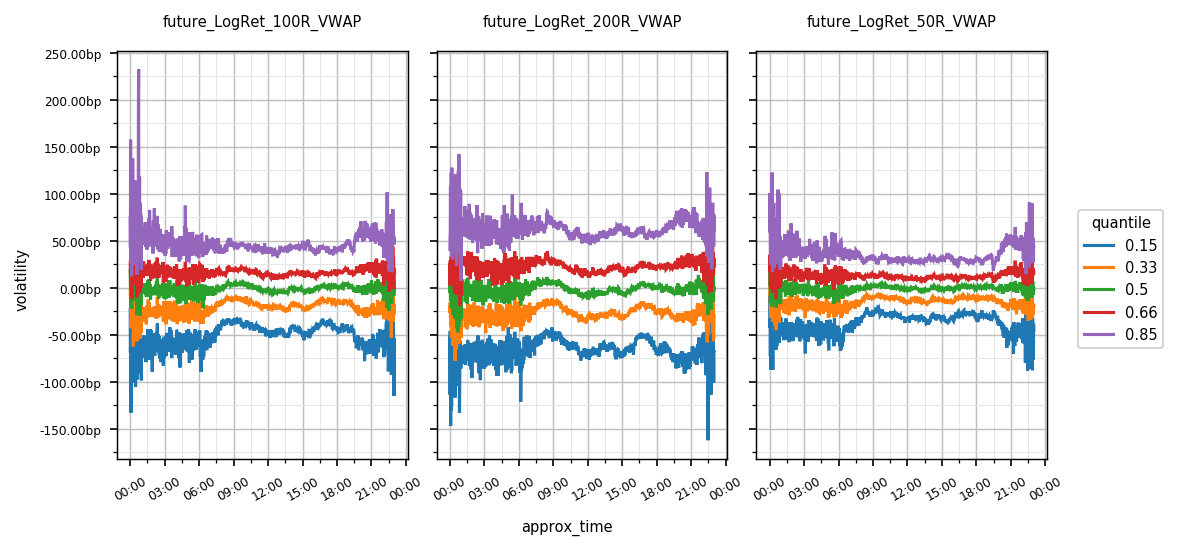

In [12]:
p = line_plot(q, 'approx_time', 'volatility', 'quantile', 'target', ylabeller=bp_labels, figsize=(8,4), fontsize=7)

# Estimate slippage

In [13]:
perpetual_ts['HHigh{}'.format(LATENCY)] = \
    perpetual_ts['High']\
    .shift(-int(LATENCY[:-1]), freq=LATENCY[-1])\
    .rolling(LATENCY)\
    .max()
    
perpetual_ts['LLow{}'.format(LATENCY)] = \
    perpetual_ts['Low']\
    .shift(-int(LATENCY[:-1]), freq=LATENCY[-1])\
    .rolling(LATENCY)\
    .min()    
    
perpetual_ts['HSlippage{}'.format(LATENCY)] = perpetual_ts['Close'] - perpetual_ts['HHigh{}'.format(LATENCY)]
perpetual_ts['LSlippage{}'.format(LATENCY)] = perpetual_ts['Close'] - perpetual_ts['LLow{}'.format(LATENCY)]
slippage_cols = ['HSlippage{}'.format(LATENCY), 'LSlippage{}'.format(LATENCY)]

# Compute horizontal barriers

In [14]:
def get_bp_volatility(df, col, rolling_kwargs):
    
    volatility = df[[col]].rolling(**rolling_kwargs).std()/df[[col]]
    volatility = volatility.fillna(method='ffill').fillna(method='bfill')
    
    if 'center' in rolling_kwargs.keys():
        new_name = 'volatility_{}_halffuture_{}'.format(col, rolling_kwargs['window'])
    else:
        new_name = 'volatility_{}_{}'.format(col, rolling_kwargs['window'])
    volatility.rename(columns={col:new_name}, inplace=True)
    
    return volatility

## Compute volatility

In [15]:
for v_par in VOLATILITY_PARAMS:
    if v_par['df']=='time':
        volatility = get_bp_volatility(perpetual_ts, PRICE_COL, v_par['rolling'])
        
        if volatility.columns[0] in perpetual_ts.columns:
            perpetual_ts.drop(volatility.columns, axis=1, inplace=True)
        perpetual_ts=perpetual_ts.join(volatility)
        
        if volatility.columns[0] in resampled.columns:
            resampled.drop(volatility.columns, axis=1, inplace=True)
        resampled=resampled.join(volatility)
    
    elif v_par['df']=='buckets':
        volatility = get_bp_volatility(resampled, PRICE_COL, v_par['rolling'])
        
        if volatility.columns[0] in resampled.columns:
            resampled.drop(volatility.columns, axis=1, inplace=True)
        resampled=resampled.join(volatility)

In [16]:
volatility = get_bp_volatility(resampled, PRICE_COL, v_par['rolling'])

## Set fees

In [17]:
resampled['fees']=FEES_BP
perpetual_ts['fees']=FEES_BP

## Set minimum barrier

In [18]:
resampled['minimum_barrier'] = resampled[['fees']].max(axis=1)
perpetual_ts['minimum_barrier'] = perpetual_ts[['fees']].max(axis=1)

# Compute targets

## Add row number idx

In [19]:
row_idx_time_df = pd.DataFrame(perpetual_ts.index)\
        .reset_index()\
        .rename(columns={'index':'row_idx_time_df'})\
        .set_index(perpetual_ts.index.name)
        
resampled=resampled.join(row_idx_time_df)

In [20]:
resampled['row_idx'] = pd.DataFrame(resampled.index).reset_index().index

## Set trading hours constraints

In [21]:
resampled['time'] = resampled.index.time

In [22]:
resampled['is_tradeable'] = (resampled['time'] >= datetime.time(*SESSION_START)) & (resampled['time'] <= datetime.time(*SESSION_END))
resampled['is_tradeable'] = resampled['is_tradeable'] & ((resampled.shape[0]-resampled['row_idx']) > max(VB_VALS)+1) 

## Compute targets

In [23]:
def get_targets(possible_targets_df,
                volatility_col,
                lower_band_threshold,
                upper_band_threshold,
                vertical_band_threshold,
                mode,
                compute_everything=False,
                verbose=False,
                log_ret=False):
    
    if mode=='bucket_vb':
        sample_rows = possible_targets_df['row_idx'].values
        price = resampled[PRICE_COL].values
        timestamps = resampled.index
        
        # set minimum barrier    
        resampled['tmp_min_barrier'] = resampled['minimum_barrier']/max(lower_band_threshold, upper_band_threshold)
        volatility = resampled[[volatility_col, 'tmp_min_barrier']].max(axis=1).values
        resampled.drop('tmp_min_barrier', axis=1, inplace=True)
        
    elif mode=='time_vb':
        sample_rows = possible_targets_df['row_idx_time_df'].values
        price = perpetual_ts[PRICE_COL].values
        timestamps = perpetual_ts.index
        
        # set minimum barrier    
        perpetual_ts['tmp_min_barrier'] = perpetual_ts['minimum_barrier']/max(lower_band_threshold, upper_band_threshold)
        volatility = perpetual_ts[[volatility_col, 'tmp_min_barrier']].max(axis=1).values
        perpetual_ts.drop('tmp_min_barrier', axis=1, inplace=True)
        

    crossing, label, label_return = \
        get_barrier_crossing(sample_rows,
                             price,
                             volatility,
                             lower_band_threshold,
                             upper_band_threshold,
                             vertical_band_threshold,
                             verbose,
                             log_ret)

    target_df = pd.DataFrame({'crossing':crossing,
                              'label':label,
                              'label_return':label_return},
                             index = possible_targets_df.index)
    
    trade_duration = compute_trade_duration(sample_rows, timestamps, crossing, verbose)
    target_df['duration'] = trade_duration
    
    # make sure crossing happens on the same day
    target_df['start_date'] = target_df.index.date
    target_df['end_date'] = (target_df.index + target_df['duration']).dt.date
    mask = target_df['start_date'] == target_df['end_date']
    target_df.drop(['start_date','end_date'], axis=1, inplace=True)
    target_df = target_df.loc[mask]
    
    # remove undefined targets
    sample_rows = sample_rows[mask.values]
    crossing = crossing[mask.values]
    label = label[mask.values]
    
    if compute_everything:
        overlapping_positions, av_uniqueness = compute_average_uniqueness(sample_rows, crossing, verbose)
        sample_weights = compute_ret_sample_weights(sample_rows, price, label, crossing, 99, verbose, log_ret)
        
        target_df['overlapping_positions'] = overlapping_positions
        target_df['av_uniqueness'] = av_uniqueness
        target_df['sample_weights'] = sample_weights      
        
    return target_df

In [24]:
targets = {}
volatility_col = 'volatility_VWAP_200'

for vb ,vol_factor in VB_VF_COMBINATIONS:
    
    print('Computing targets with vb={}, vol_factor={}...'.format(vb, vol_factor))
    
    target_df = get_targets(resampled.query('is_tradeable'),
                            volatility_col,
                            vol_factor,
                            vol_factor,
                            vb,
                            mode='bucket_vb',
                            compute_everything=True,
                            verbose=False,
                            log_ret=False)
    strategy = 'vb{}_vf{}_{}'.format(vb, vol_factor, volatility_col)
    
    targets[strategy] = target_df
    
    # save targets
    target_df.to_pickle(target_save_folder + '{}.pickle'.format(strategy))

Computing targets with vb=50, vol_factor=2...


/home/cqc5/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/ipykernel/__main__.py:62: RuntimeWarning: divide by zero encountered in true_divide


Computing targets with vb=50, vol_factor=3...


/home/cqc5/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/ipykernel/__main__.py:62: RuntimeWarning: divide by zero encountered in true_divide


Computing targets with vb=100, vol_factor=2...
Computing targets with vb=100, vol_factor=3...
Computing targets with vb=200, vol_factor=2...
Computing targets with vb=200, vol_factor=3...


# Explore targets

In [25]:
target_df = (pd.concat(targets)
             .reset_index()
             .rename(columns = {'level_0':'strategy'})
             .set_index('bucket_end')
             .sample(frac=0.01))

In [26]:
target_df['seconds_duration'] = target_df['duration'].dt.total_seconds()
target_df['minutes_duration'] = target_df['seconds_duration']/60

## Returns

/home/cqc5/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/matplotlib/__init__.py:1855: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)
2018-08-08 16:59:07,824 - matplotlib.font_manager - findfont - DEBUG - findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=medium:stretch=normal:size=11.661999999999999 to DejaVu Sans ('/home/cqc5/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.145000
2018-08-08 16:59:07,873 - matplotlib.font_manager - findfont - DEBUG - findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=medium:stretch=normal:size=14.0 to DejaVu Sans ('/home/cqc5/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.145000


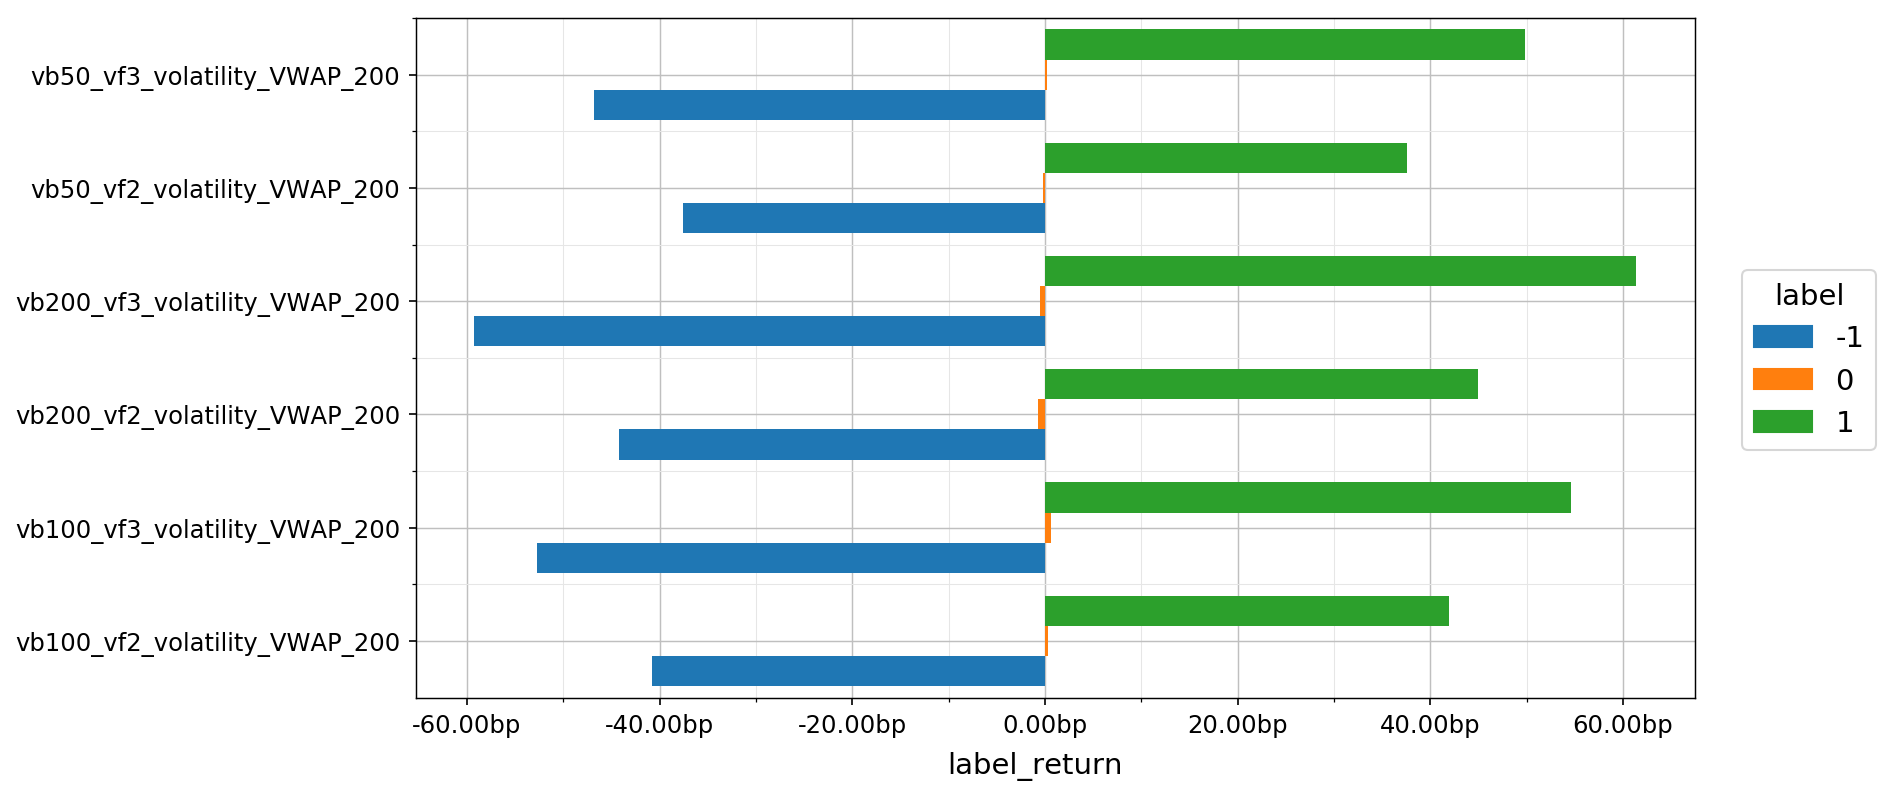

In [27]:
p = bar_plot(target_df, 'strategy', 'label_return', 'label', bars_position='dodge', aggfun='mean', bars_orientation='horizontal', xlab='', ylabeller=bp_labels)

## Number of targets

/home/cqc5/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/matplotlib/__init__.py:1855: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


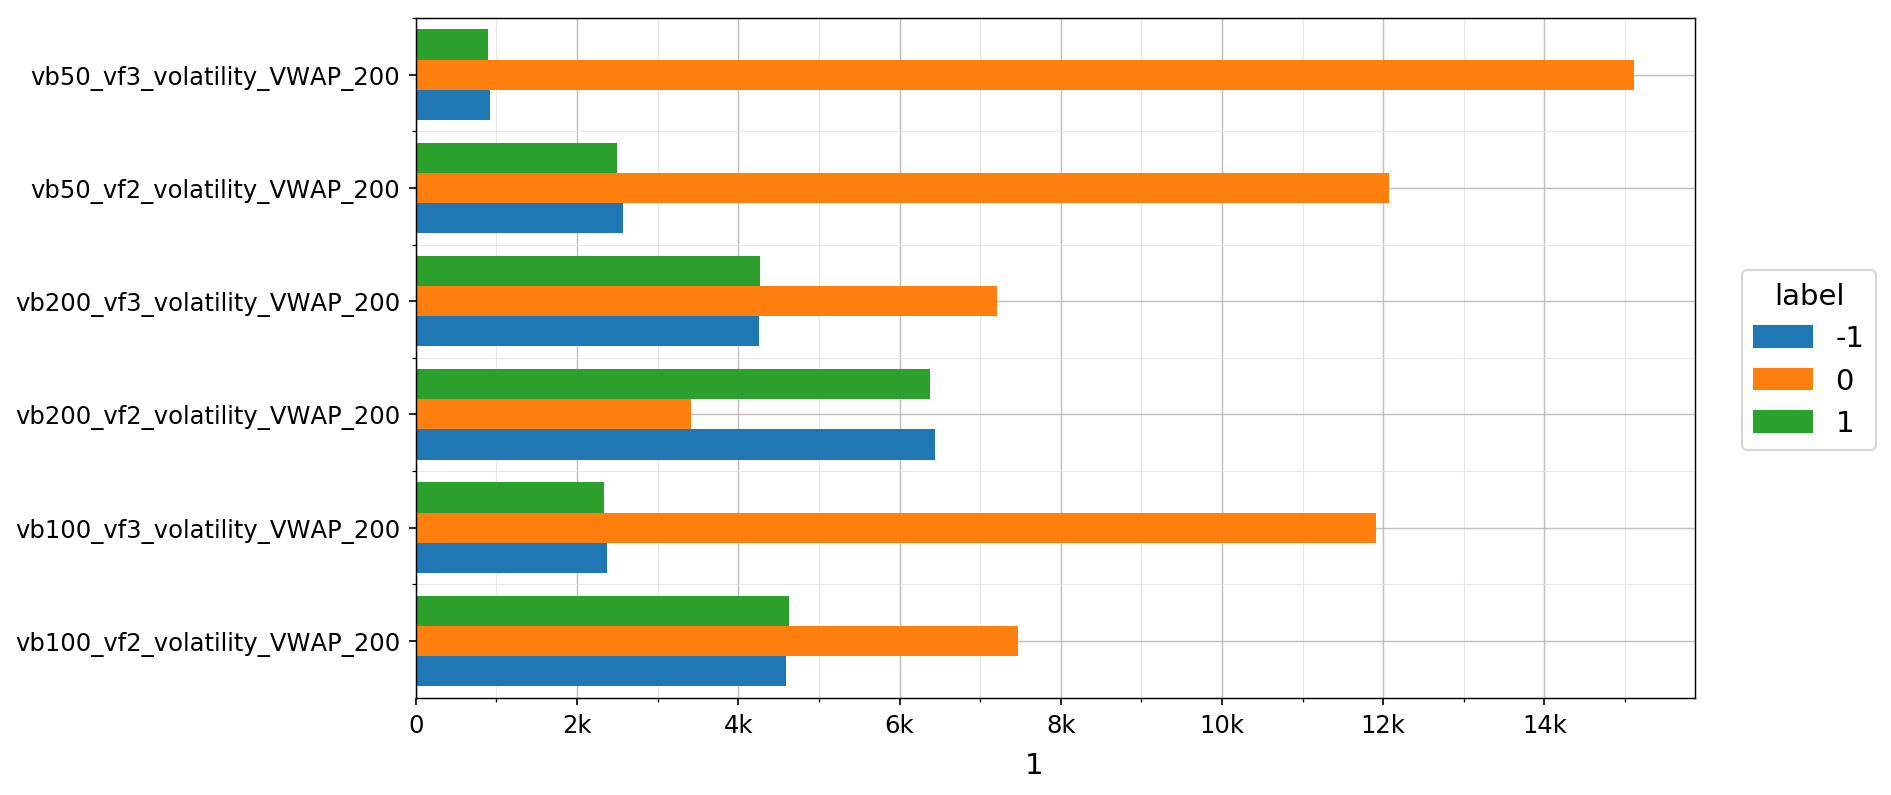

In [28]:
p = bar_plot(target_df, 'strategy', '1', 'label', bars_position='dodge', aggfun='sum', bars_orientation='horizontal', xlab='')

## Return histogram

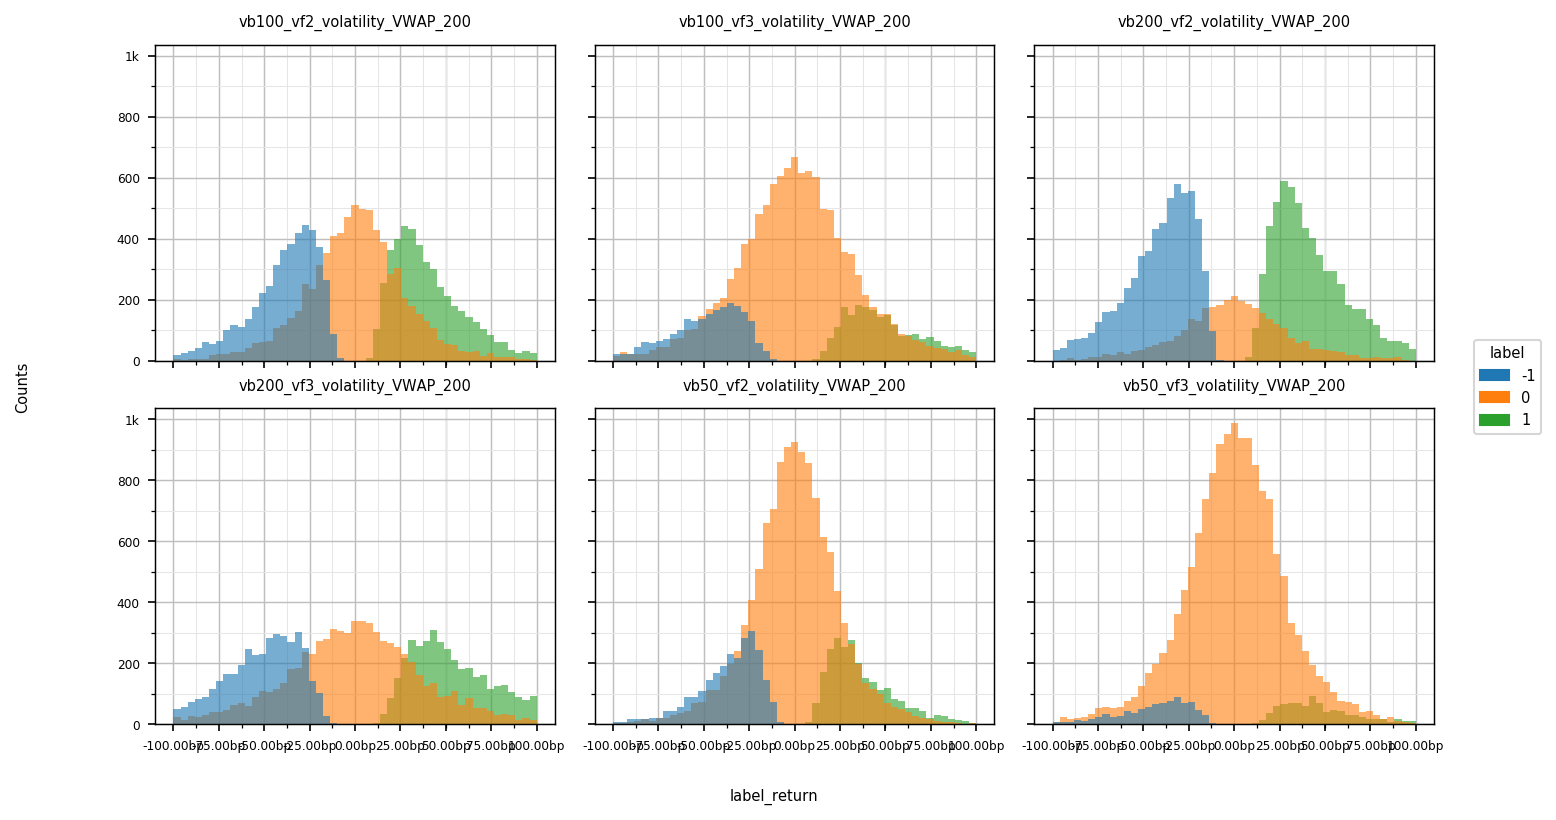

In [29]:
p = hist_plot(target_df, 'label_return', group = 'label',facet_x='strategy', var_range=[-0.01,0.01], position='overlay', bins=51, xlabeller=bp_labels, fontsize=7)

## Duration

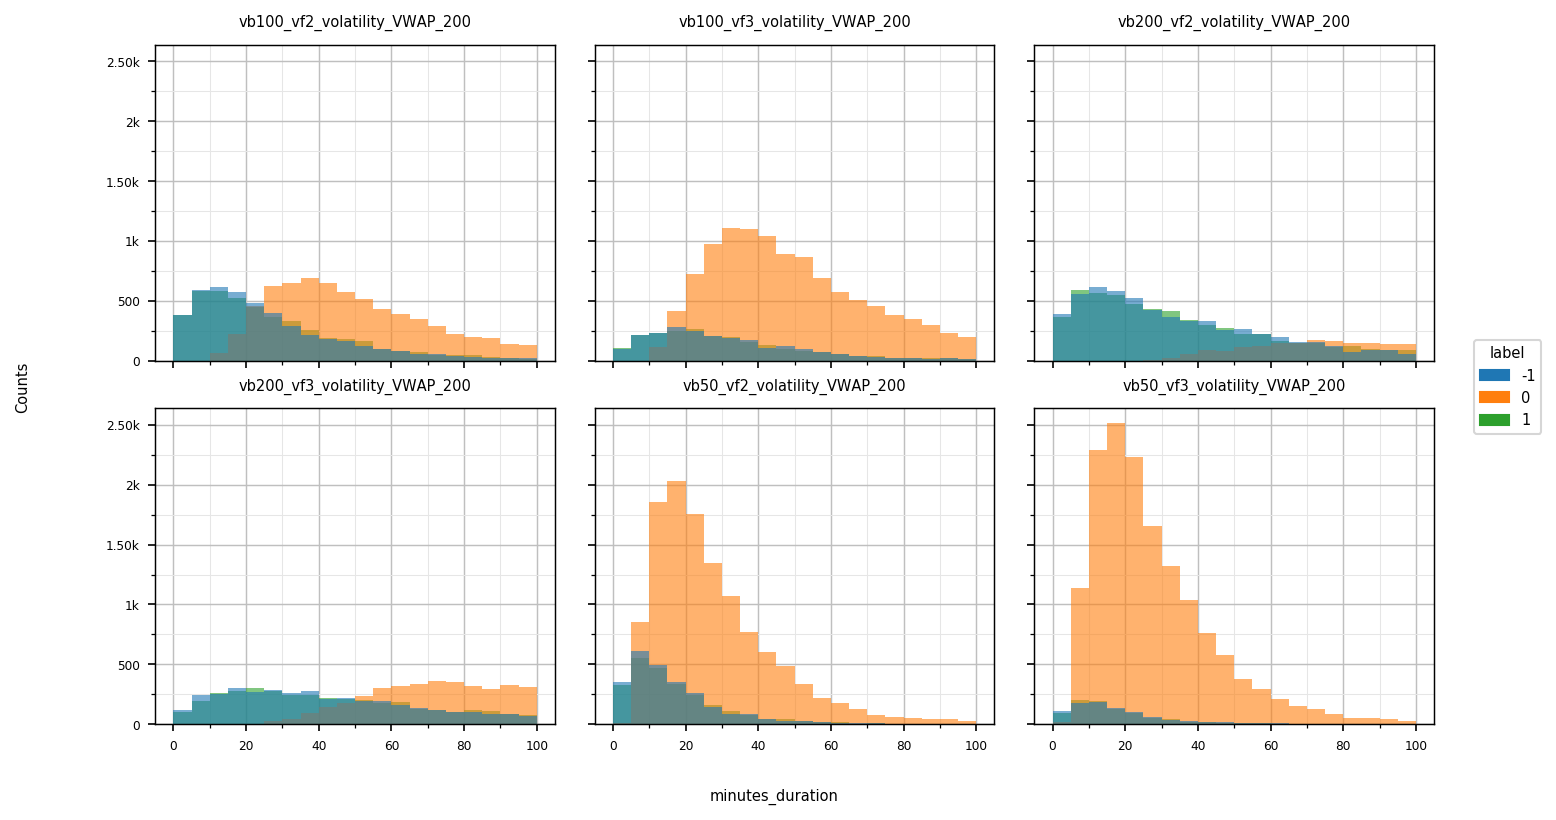

In [30]:
p = hist_plot(target_df, 'minutes_duration', group = 'label',facet_x='strategy', var_range=[0, 100], position='overlay', fontsize=7)

## Sample weights

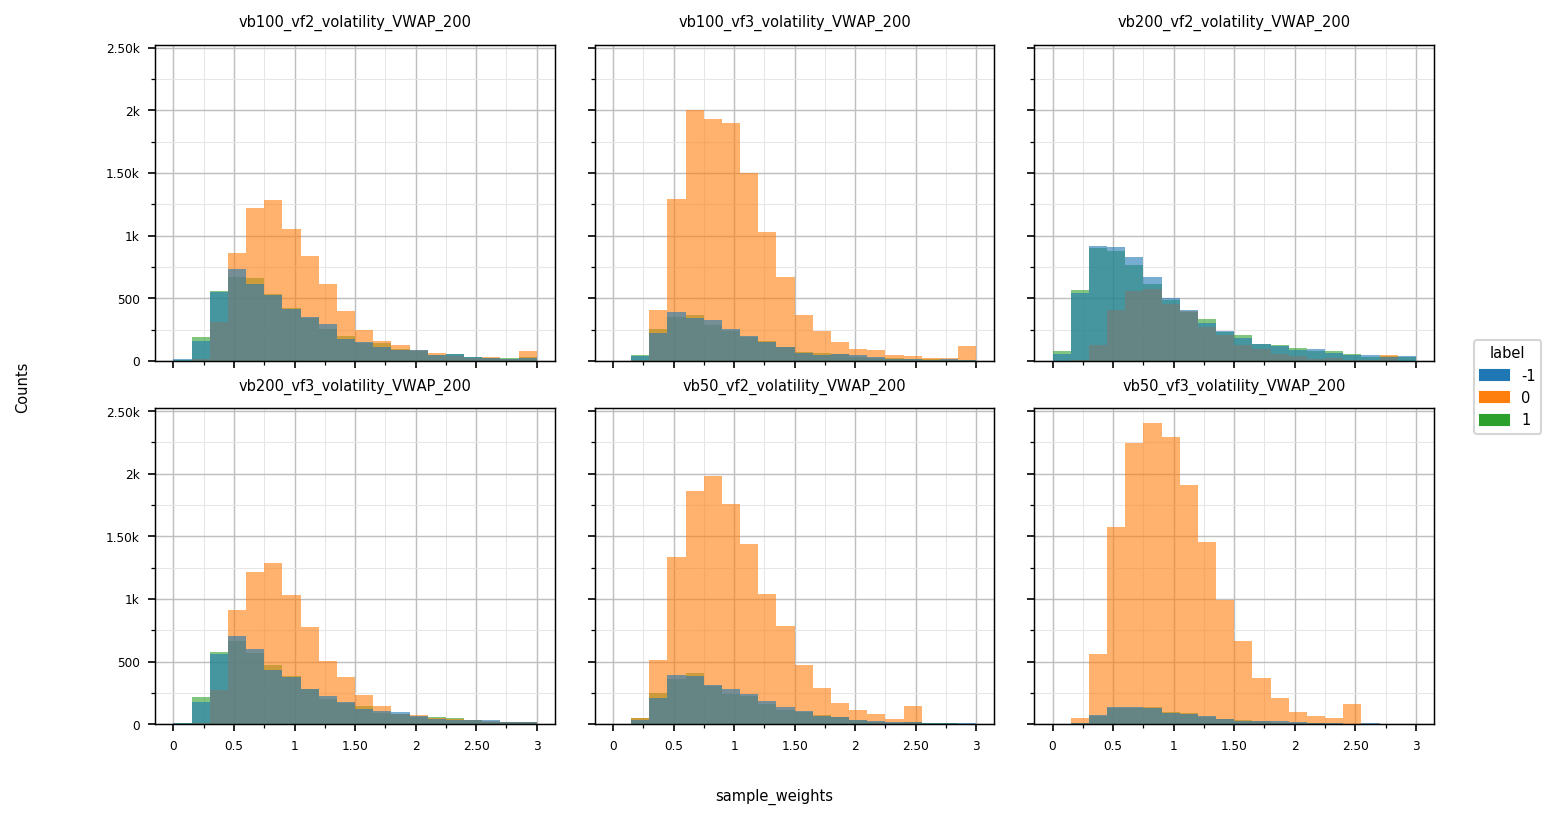

In [31]:
p = hist_plot(target_df, 'sample_weights', group = 'label',facet_x='strategy', var_range=[0, 3], position='overlay', fontsize=7)

## Summary table

In [32]:
target_df['label_return_bp'] = target_df['label_return'] *10000
target_df.groupby(['strategy', 'label'])[['minutes_duration', 'label_return_bp']].describe()

minutes_duration                         \
                                               count        mean        std   
strategy                      label                                           
vb100_vf2_volatility_VWAP_200 -1              4589.0   28.769939  26.600596   
                               0              7472.0   55.841899  31.032783   
                               1              4629.0   29.613397  26.033326   
vb100_vf3_volatility_VWAP_200 -1              2370.0   34.007278  27.380858   
                               0             11914.0   54.780126  30.034989   
                               1              2340.0   34.203454  27.525183   
vb200_vf2_volatility_VWAP_200 -1              6437.0   43.319326  39.347791   
                               0              3415.0  110.239824  51.918319   
                               1              6376.0   44.796934  40.832541   
vb200_vf3_volatility_VWAP_200 -1              4254.0   54.323891  43.807028   
                               0              7215.0  110.165027  51.323072   
                               1              4266.0   56.192374  45.244344   
vb50_vf2_volatility_VWAP_200  -1              2571.0   17.934461  18.562518   
                               0             12075.0   28.459006  19.179708   
                               1              2496.0   18.719050  18.327347   
vb50_vf3_volatility_VWAP_200  -1               921.0   18.900832  17.883106   
                               0             15107.0   28.274288  19.086151   
                               1               891.0   18.171904  16.493790   

                                                                      \
                                           min        25%        50%   
strategy                      label                                    
vb100_vf2_volatility_VWAP_200 -1      0.166667  11.166667  21.333333   
                               0      9.250000  33.833333  48.166667   
                               1      0.166667  11.583333  22.500000   
vb100_vf3_volatility_VWAP_200 -1      0.333333  15.583333  27.083333   
                               0      9.250000  33.333333  47.583333   
                               1      0.500000  15.395833  27.166667   
vb200_vf2_volatility_VWAP_200 -1      0.250000  15.166667  31.500000   
                               0     24.833333  71.583333  99.166667   
                               1      0.083333  15.583333  32.375000   
vb200_vf3_volatility_VWAP_200 -1      0.333333  22.666667  42.916667   
                               0     20.750000  71.666667  99.333333   
                               1      0.666667  23.416667  44.875000   
vb50_vf2_volatility_VWAP_200  -1      0.166667   7.333333  13.000000   
                               0      4.333333  15.666667  23.583333   
                               1      0.250000   7.833333  13.833333   
vb50_vf3_volatility_VWAP_200  -1      0.166667   8.166667  14.333333   
                               0      4.416667  15.583333  23.500000   
                               1      0.166667   8.250000  13.833333   

                                                            label_return_bp  \
                                            75%         max           count   
strategy                      label                                           
vb100_vf2_volatility_VWAP_200 -1      36.833333  268.833333          4589.0   
                               0      69.750000  316.166667          7472.0   
                               1      39.416667  219.500000          4629.0   
vb100_vf3_volatility_VWAP_200 -1      45.000000  213.250000          2370.0   
                               0      69.145833  298.666667         11914.0   
                               1      44.333333  219.833333          2340.0   
vb200_vf2_volatility_VWAP_200 -1      58.666667  335.666667          6437.0   
                               0     138.916667  403.666667          3415

## Explore few days

In [33]:
to_plot = 'vb100_vf2_volatility_VWAP_200'

In [34]:
tmp = resampled.join(targets[to_plot])[['VWAP', 'label']]
tmp['label'].fillna(42, inplace=True)

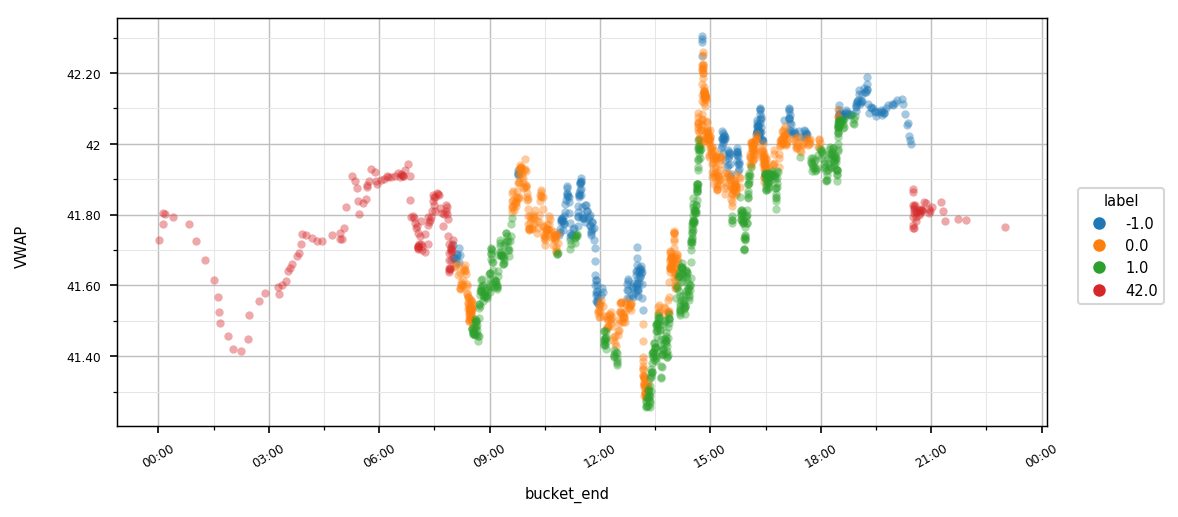

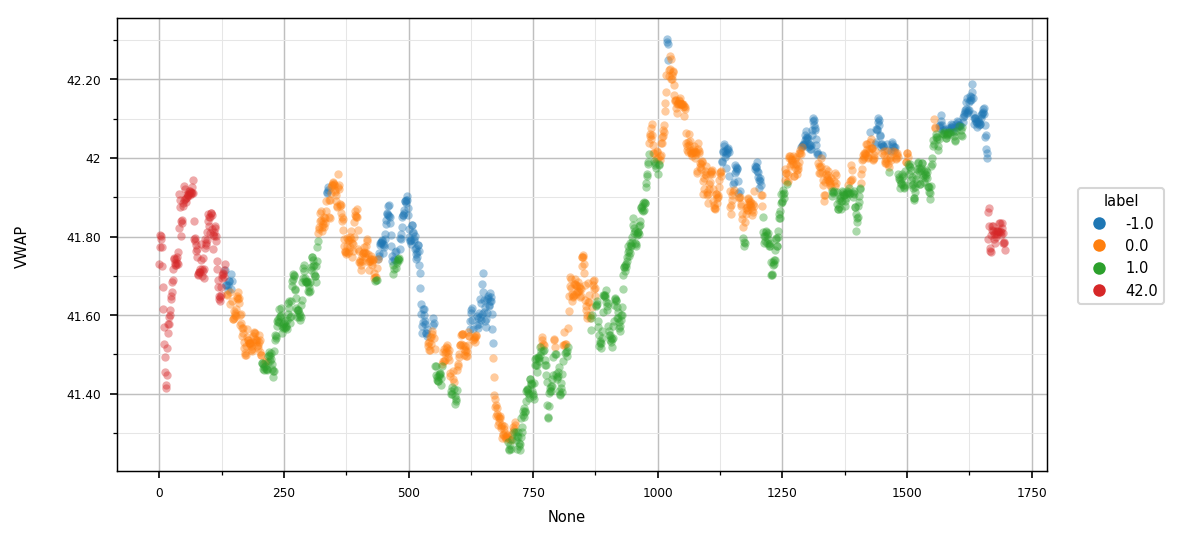

In [35]:
start = datetime.datetime(2016,3,22)
end = datetime.datetime(2016,3,23)
mask = (tmp.index>=start) & (tmp.index<=end)
p = scatter_plot(tmp.loc[mask], '.index', 'VWAP', 'label', alpha=0.4, figsize=(8,4), ms=4, fontsize=7)
p = scatter_plot(tmp.loc[mask].reset_index(), '.index', 'VWAP', 'label', alpha=0.4,  figsize=(8,4), ms=4, fontsize=7)

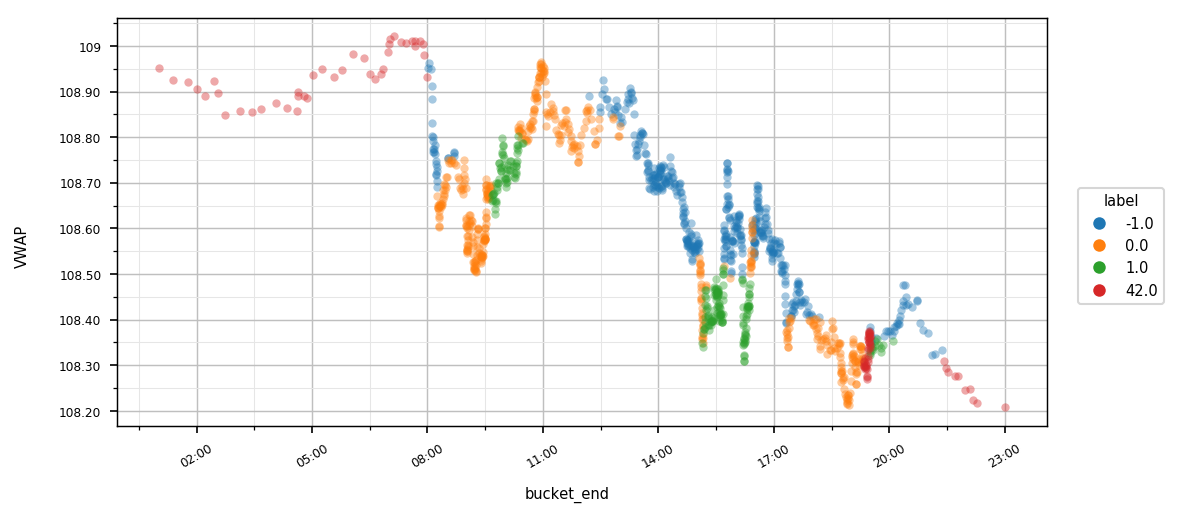

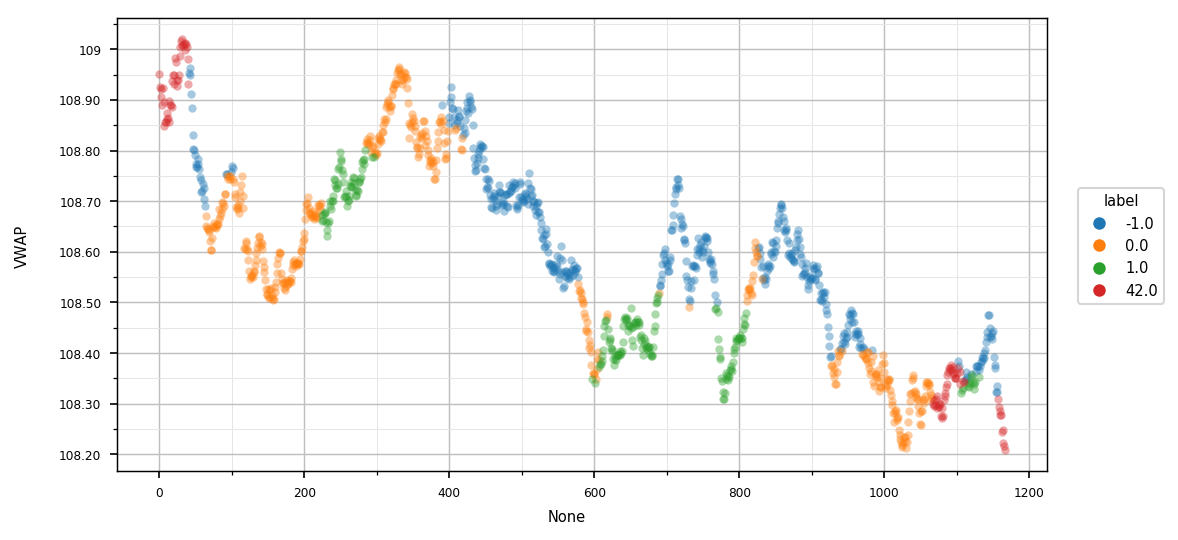

In [36]:
start = datetime.datetime(2014,7,9)
end = datetime.datetime(2014,7,10)
mask = (tmp.index>=start) & (tmp.index<=end)
p = scatter_plot(tmp.loc[mask], '.index', 'VWAP', 'label', alpha=0.4, figsize=(8,4), ms=4, fontsize=7)
p = scatter_plot(tmp.loc[mask].reset_index(), '.index', 'VWAP', 'label', alpha=0.4,  figsize=(8,4), ms=4, fontsize=7)

# Save targets in a unique file

In [37]:
to_save = []
for k, t_df in targets.items():
    
    tmp_df = t_df[['label', 'label_return','sample_weights']]
    tmp_df.columns = [c.replace('label', 'target') + '_' + k for c in tmp_df.columns]
    tmp_df.columns = [c.replace('target_return', 'futureReturn') for c in tmp_df.columns]
    
    one_hot_targets = pd.get_dummies(tmp_df['target_' + k], prefix=k+'_'+'target')
    one_hot_targets.columns = [c.replace(k + '_', '') + '_' + k for c in one_hot_targets.columns]
    tmp_df = tmp_df.join(one_hot_targets)
    
    tmp_df['defined_target_'+k]=1
    
    to_save.append(tmp_df)
    
to_save = reduce(lambda df1, df2: df1.join(df2, how="outer"), to_save)
to_save=to_save.join(resampled[volatility_col])

target_saver = DataSaver(target_save_folder + '{}/'.format(volatility_col))
target_saver.save_df(to_save)